In [1]:
import pandas as pd

# Cargá los datos
df_ind = pd.read_excel("D:/Mis documentos/Estudio/Lic en economia/2do Año/Big data & machine learning/Tps/TP II/EPH_usu_3_Trim_2024_xls/EPH_usu_3er_Trim_2024_xlsx/usu_individual_T324.xlsx")  # ejemplo

# Vemos las primeras filas y las columnas
print(df_ind.shape)
print(df_ind.columns)
df_ind.head()


(47564, 177)
Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR',
       'PDECCFR', 'ADECCFR', 'PONDIH'],
      dtype='object', length=177)


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,TQRMNOPTVHLOKRCDEFJAH00803557,2024,3,1,1,1,43,N,3,234,...,12.0,12,0.0,12,12.0,12,NaN,12.0,12,0
1,TQRMNOPTVHLOKRCDEFJAH00803557,2024,3,1,2,1,43,N,3,234,...,12.0,12,0.0,12,12.0,12,NaN,12.0,12,0
2,TQRMNOQPRHKLKNCDEFJAH00868631,2024,3,1,1,1,43,N,3,277,...,10.0,9,1075000.0,10,10.0,10,NaN,10.0,10,484
3,TQRMNOQPRHKLKNCDEFJAH00868631,2024,3,1,2,1,43,N,3,277,...,10.0,9,1075000.0,10,10.0,10,NaN,10.0,10,484
4,TQRMNORVXHKLKNCDEFJAH00868632,2024,3,1,1,1,43,N,3,281,...,10.0,10,920200.0,9,10.0,9,NaN,10.0,9,709


In [2]:
# Seleccionamos las columnas relevantes
columnas_ind = [
    "CODUSU", "NRO_HOGAR", "COMPONENTE",  # identificadores
    "ESTADO", "CH04", "CH06",             # datos personales
    "P21", "P47T", "PONDERA"              # ingresos y ponderador
]

df_ind = df_ind[columnas_ind]

# Renombramos columnas para mayor claridad (opcional)
df_ind = df_ind.rename(columns={
    "CH04": "sexo",
    "CH06": "edad",
    "P21": "ingreso_principal",
    "P47T": "ingreso_total_ind",
    "ESTADO": "actividad"
})




In [3]:

print(df_ind.columns.tolist())

['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'actividad', 'sexo', 'edad', 'ingreso_principal', 'ingreso_total_ind', 'PONDERA']


In [4]:
# Cargá la base hogar
df_hogar = pd.read_excel("D:/Mis documentos/Estudio/Lic en economia/2do Año/Big data & machine learning/Tps/TP II/EPH_usu_3_Trim_2024_xls/EPH_usu_3er_Trim_2024_xlsx/usu_hogar_T324.xlsx")

# Columnas relevantes
columnas_hogar = [
    "CODUSU", "NRO_HOGAR", "ITF", "IPCF", "IX_TOT",
    "REGION", "AGLOMERADO", "PONDIH"
]

df_hogar = df_hogar[columnas_hogar]

df_hogar = df_hogar.rename(columns={
    "ITF": "ingreso_familiar",
    "IPCF": "ingreso_per_capita",
    "IX_TOT": "miembros_hogar"
})

In [5]:
print(df_hogar.columns.tolist())

df_ind = df_ind[["actividad", "PONDERA"]]

# Diccionario de etiquetas de condición de actividad
actividad_labels = {
    1: "Ocupado",
    2: "Desocupado",
    3: "Inactivo",
    4: "Menor de 10 años",
    0: "No respondido"
}

# Reemplazar los códigos por texto
df_ind["actividad"] = df_ind["actividad"].replace(actividad_labels)



['CODUSU', 'NRO_HOGAR', 'ingreso_familiar', 'ingreso_per_capita', 'miembros_hogar', 'REGION', 'AGLOMERADO', 'PONDIH']


In [6]:
# Agrupamos por estado laboral y sumamos la ponderación
conteo_ponderado = df_ind.groupby("actividad")["PONDERA"].sum()

# Mostrar los resultados
print(conteo_ponderado)


actividad
Desocupado            994334
Inactivo            11246323
Menor de 10 años     4053207
No respondido          58241
Ocupado             13368040
Name: PONDERA, dtype: int64


In [7]:


activos = conteo_ponderado["Ocupado"] + conteo_ponderado["Desocupado"]
total_mayores_10 = df_ind[df_ind["actividad"] != "menor de 10 años"]["PONDERA"].sum()

tasa_actividad = activos / total_mayores_10
print(f"Tasa de actividad: {tasa_actividad:.2%}")


Tasa de actividad: 48.33%


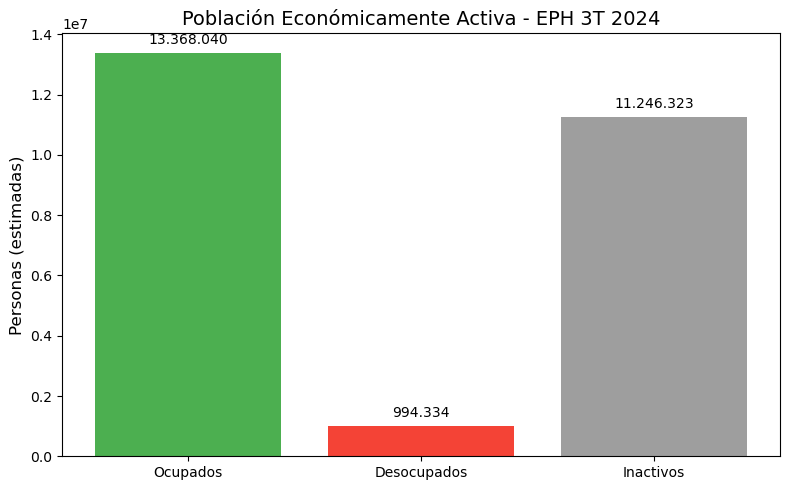

In [8]:
import matplotlib.pyplot as plt

# Reutilizamos tus datos
datos_pea = {
    "Ocupados": 13368040,
    "Desocupados": 994334,
    "Inactivos": 11246323  # opcional, podés excluirlo si querés enfocarte solo en PEA
}

# Colores opcionales para que se vea más pro
colores = ["#4CAF50", "#F44336", "#9E9E9E"]  # verde, rojo, gris

# Crear gráfico
plt.figure(figsize=(8, 5))
plt.bar(datos_pea.keys(), datos_pea.values(), color=colores)

# Agregar texto encima de las barras
for i, valor in enumerate(datos_pea.values()):
    plt.text(i, valor + 300000, f"{valor:,}".replace(",", "."), ha='center', fontsize=10)

# Títulos y etiquetas
plt.title("Población Económicamente Activa - EPH 3T 2024", fontsize=14)
plt.ylabel("Personas (estimadas)", fontsize=12)
plt.tight_layout()

# Mostrar gráfico
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar base de hogares (asegurate de tener la correcta)
df_hogar = pd.read_excel("D:/Mis documentos/Estudio/Lic en economia/2do Año/Big data & machine learning/Tps/TP II/EPH_usu_3_Trim_2024_xls/EPH_usu_3er_Trim_2024_xlsx/usu_hogar_T324.xlsx")

# Filtrar columnas necesarias
df_hogar = df_hogar[["ITF", "IPCF"]]

# Eliminar valores nulos o negativos (casos sin ingresos)
df_hogar = df_hogar[(df_hogar["ITF"] > 0) & (df_hogar["IPCF"] > 0)]

# ---------------------------
# 📊 HISTOGRAMA: INGRESO FAMILIAR
# ---------------------------
plt.figure(figsize=(9, 5))
sns.histplot(df_hogar["ITF"], bins=50, kde=True, color="#3E91E5")
plt.title("Distribución del ingreso total por hogar (ITF)\nEPH 3T 2024", fontsize=14)
plt.xlabel("Ingreso total familiar (pesos)")
plt.ylabel("Cantidad de hogares")
plt.tight_layout()
plt.show()

# ---------------------------
# 📊 HISTOGRAMA: INGRESO PER CÁPITA
# ---------------------------
plt.figure(figsize=(9, 5))
sns.histplot(df_hogar["IPCF"], bins=50, kde=True, color="#00BFA6")
plt.title("Distribución del ingreso per cápita familiar (IPCF)\nEPH 3T 2024", fontsize=14)
plt.xlabel("Ingreso per cápita familiar (pesos)")
plt.ylabel("Cantidad de hogares")
plt.tight_layout()
plt.show()


In [ ]:
print("Ingreso familiar (ITF) - Media:", df_hogar["ITF"].mean())
print("Ingreso familiar (ITF) - Mediana:", df_hogar["ITF"].median())

print("Ingreso per cápita (IPCF) - Media:", df_hogar["IPCF"].mean())
print("Ingreso per cápita (IPCF) - Mediana:", df_hogar["IPCF"].median())


Ingreso familiar (ITF) - Media: 1024596.9718467568
Ingreso familiar (ITF) - Mediana: 800000.0
Ingreso per cápita (IPCF) - Media: 451313.69184595696
Ingreso per cápita (IPCF) - Mediana: 328333.33


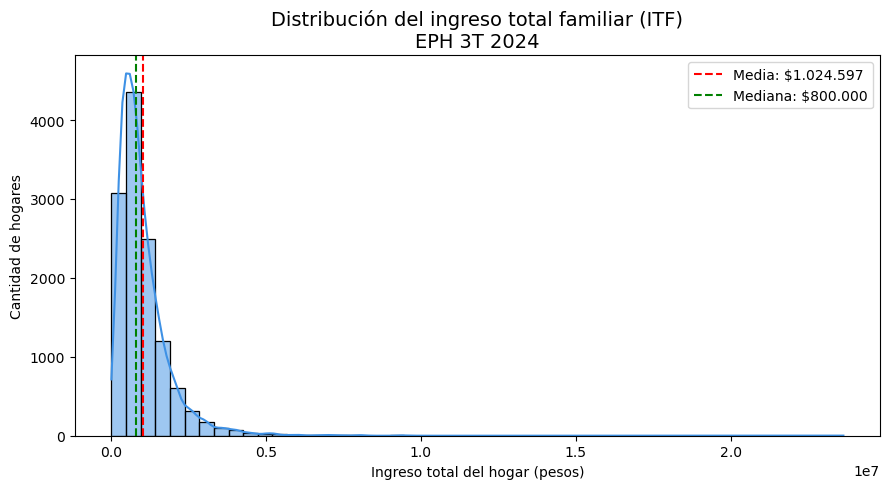

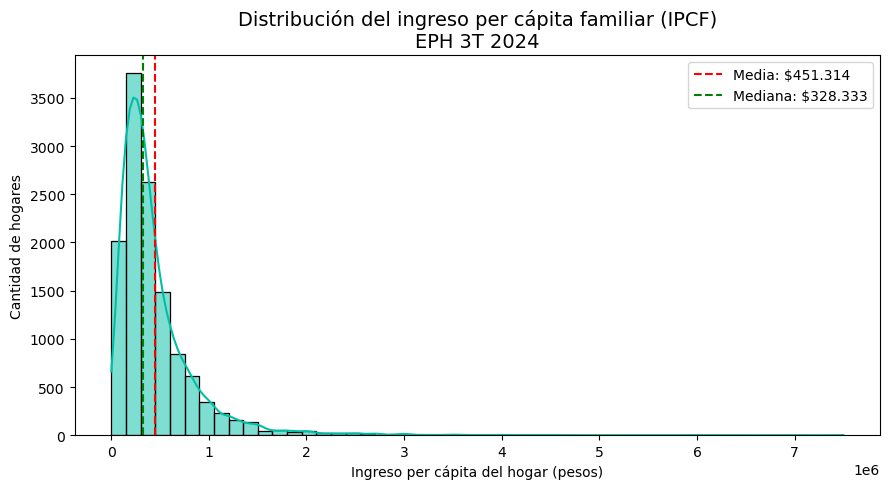

In [ ]:
# Nos quedamos solo con ITF e IPCF, y descartamos valores no válidos
df_hogar = df_hogar[["ITF", "IPCF"]]
df_hogar = df_hogar[(df_hogar["ITF"] > 0) & (df_hogar["IPCF"] > 0)]

# Calcular estadísticos
media_itf = df_hogar["ITF"].mean()
mediana_itf = df_hogar["ITF"].median()

media_ipcf = df_hogar["IPCF"].mean()
mediana_ipcf = df_hogar["IPCF"].median()

# ---------------------------
# 📊 Gráfico de ITF (ingreso familiar total)
# ---------------------------
plt.figure(figsize=(9, 5))
sns.histplot(df_hogar["ITF"], bins=50, kde=True, color="#3E91E5")
plt.axvline(media_itf, color="red", linestyle="--", label=f"Media: ${media_itf:,.0f}".replace(",", "."))
plt.axvline(mediana_itf, color="green", linestyle="--", label=f"Mediana: ${mediana_itf:,.0f}".replace(",", "."))
plt.title("Distribución del ingreso total familiar (ITF)\nEPH 3T 2024", fontsize=14)
plt.xlabel("Ingreso total del hogar (pesos)")
plt.ylabel("Cantidad de hogares")
plt.legend()
plt.tight_layout()
plt.show()

# ---------------------------
# 📊 Gráfico de IPCF (ingreso per cápita)
# ---------------------------
plt.figure(figsize=(9, 5))
sns.histplot(df_hogar["IPCF"], bins=50, kde=True, color="#00BFA6")
plt.axvline(media_ipcf, color="red", linestyle="--", label=f"Media: ${media_ipcf:,.0f}".replace(",", "."))
plt.axvline(mediana_ipcf, color="green", linestyle="--", label=f"Mediana: ${mediana_ipcf:,.0f}".replace(",", "."))
plt.title("Distribución del ingreso per cápita familiar (IPCF)\nEPH 3T 2024", fontsize=14)
plt.xlabel("Ingreso per cápita del hogar (pesos)")
plt.ylabel("Cantidad de hogares")
plt.legend()
plt.tight_layout()
plt.show()


# Como puede observarse en los gráficos, tanto el ingreso total como el ingreso per cápita muestran distribuciones asimétricas positivas, 
# con una media superior a la mediana. Esto indica que hay una minoría de hogares con ingresos muy altos que elevan el promedio, 
# mientras que la mayoría se concentra en valores más bajos.